In [2]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.utils.data import DataLoader, TensorDataset, random_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

print(torch.version.cuda)
print(torch.__version__)
torch.manual_seed(1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.cuda.manual_seed_all(1)
    print('cuda index:', torch.cuda.current_device())


False
None
1.10.0


In [4]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression,self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        return x


def remove_outliers(df, column_name, lower, upper):
    removed_outliers = df[column_name].between(df[column_name].quantile(lower), df[column_name].quantile(upper))

    print(str(df[column_name][removed_outliers].size) + "/" + str(sample_data[column_name].size) + " data points remain.")

    index_names = df[~removed_outliers].index
    return df.drop(index_names)


def evaluateRegressor(true, predicted, message="    Test Set"):
    MSE = mean_squared_error(true, predicted, squared=True)
    MAE = mean_absolute_error(true, predicted)
    RMSE = mean_squared_error(true, predicted, squared=False)
    R_squared = r2_score(true, predicted)

    print(message)
    print("MSE :", MSE)
    print("MAE :", MAE)
    print("RMSE :", RMSE)
    print("R-Squared :", R_squared)



In [5]:
sample_data = pd.read_csv("sample.csv")
sample_data = remove_outliers(sample_data, "co2", 0.05, 0.95)
idx_zero_temp = sample_data[sample_data['temp'] == 0].index
sample_data = sample_data.drop(idx_zero_temp)
idx_zero_temp = sample_data[sample_data['stress'] == -1].index
sample_data = sample_data.drop(idx_zero_temp)
sample_data.info(verbose=True, show_counts=True)

sample_data = pd.get_dummies(sample_data)                       # Embedding
x_data = sample_data.iloc[:, 5:]
y_data = sample_data.iloc[:, [0, 1, 2, 3, 4]]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
# x_data.info(verbose=True, show_counts=True)

learning_rate = 0.15
iteration_number = 30000

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

y_train_scaled = sc.fit_transform(y_train)
y_test_scaled = sc.transform(y_test)

x_train_scaled = np.array(x_train_scaled, dtype=np.float32)
y_train_scaled = np.array(y_train_scaled, dtype=np.float32)
x_test_scaled = np.array(x_test_scaled, dtype=np.float32)
y_test_scaled = np.array(y_test_scaled, dtype=np.float32)

inputs = torch.from_numpy(x_train_scaled)
targets = torch.from_numpy(y_train_scaled)

test_inputs = torch.from_numpy(x_test_scaled)
test_targets = torch.from_numpy(y_test_scaled)

input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

model = LinearRegression(input_dim, output_dim)
mse = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

112556/124615 data points remain.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111440 entries, 0 to 124614
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   co2         111440 non-null  int64  
 1   temp        111440 non-null  float64
 2   humid       111440 non-null  float64
 3   csd         111440 non-null  int64  
 4   sound       111440 non-null  int64  
 5   state       111440 non-null  object 
 6   age         111440 non-null  int64  
 7   gender      111440 non-null  object 
 8   height      111440 non-null  int64  
 9   weight      111440 non-null  int64  
 10  disease     111440 non-null  object 
 11  depressive  111440 non-null  int64  
 12  disorder    111440 non-null  object 
 13  media       111440 non-null  int64  
 14  liquor      111440 non-null  int64  
 15  smoke       111440 non-null  int64  
 16  caffeine    111440 non-null  int64  
 17  exercise    111440 non-null  int64  
 18  stress    

C:\Users\user\anaconda3\envs\ai_env\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch   0, trian loss : 1.016886, test loss : 1.011315 
epoch  50, trian loss : 0.997370, test loss : 1.003726 
epoch 100, trian loss : 0.993362, test loss : 0.999735 
epoch 150, trian loss : 0.988680, test loss : 0.995072 
epoch 200, trian loss : 0.982815, test loss : 0.989232 
epoch 250, trian loss : 0.975177, test loss : 0.981626 
epoch 300, trian loss : 0.965228, test loss : 0.971715 
epoch 350, trian loss : 0.952898, test loss : 0.959427 
epoch 400, trian loss : 0.939126, test loss : 0.945687 
epoch 450, trian loss : 0.925556, test loss : 0.932103 
epoch 500, trian loss : 0.913058, test loss : 0.919516 
epoch 550, trian loss : 0.901144, test loss : 0.907451 
epoch 600, trian loss : 0.889009, test loss : 0.895137 
epoch 650, trian loss : 0.876331, test loss : 0.882278 
epoch 700, trian loss : 0.863273, test loss : 0.869046 
epoch 750, trian loss : 0.850244, test loss : 0.855854 
epoch 800, trian loss : 0.837726, test loss : 0.843181 
epoch 850, trian loss : 0.826169, test loss : 0.

epoch 7250, trian loss : 0.489341, test loss : 0.488207 
epoch 7300, trian loss : 0.487251, test loss : 0.486113 
epoch 7350, trian loss : 0.485212, test loss : 0.484073 
epoch 7400, trian loss : 0.483219, test loss : 0.482084 
epoch 7450, trian loss : 0.481270, test loss : 0.480143 
epoch 7500, trian loss : 0.479362, test loss : 0.478247 
epoch 7550, trian loss : 0.477493, test loss : 0.476393 
epoch 7600, trian loss : 0.475659, test loss : 0.474578 
epoch 7650, trian loss : 0.473859, test loss : 0.472799 
epoch 7700, trian loss : 0.472089, test loss : 0.471055 
epoch 7750, trian loss : 0.470348, test loss : 0.469342 
epoch 7800, trian loss : 0.468634, test loss : 0.467658 
epoch 7850, trian loss : 0.466945, test loss : 0.466002 
epoch 7900, trian loss : 0.465280, test loss : 0.464372 
epoch 7950, trian loss : 0.463637, test loss : 0.462767 
epoch 8000, trian loss : 0.462015, test loss : 0.461184 
epoch 8050, trian loss : 0.460413, test loss : 0.459623 
epoch 8100, trian loss : 0.4588

epoch 14400, trian loss : 0.358321, test loss : 0.360787 
epoch 14450, trian loss : 0.357963, test loss : 0.360425 
epoch 14500, trian loss : 0.357384, test loss : 0.359849 
epoch 14550, trian loss : 0.356767, test loss : 0.359239 
epoch 14600, trian loss : 0.356301, test loss : 0.358779 
epoch 14650, trian loss : 0.355986, test loss : 0.358464 
epoch 14700, trian loss : 0.355669, test loss : 0.358145 
epoch 14750, trian loss : 0.355218, test loss : 0.357693 
epoch 14800, trian loss : 0.354673, test loss : 0.357151 
epoch 14850, trian loss : 0.354174, test loss : 0.356657 
epoch 14900, trian loss : 0.353789, test loss : 0.356273 
epoch 14950, trian loss : 0.353459, test loss : 0.355942 
epoch 15000, trian loss : 0.353080, test loss : 0.355560 
epoch 15050, trian loss : 0.352616, test loss : 0.355096 
epoch 15100, trian loss : 0.352134, test loss : 0.354616 
epoch 15150, trian loss : 0.351710, test loss : 0.354193 
epoch 15200, trian loss : 0.351350, test loss : 0.353833 
epoch 15250, t

epoch 21500, trian loss : 0.314726, test loss : 0.316611 
epoch 21550, trian loss : 0.314513, test loss : 0.316394 
epoch 21600, trian loss : 0.314302, test loss : 0.316177 
epoch 21650, trian loss : 0.314092, test loss : 0.315961 
epoch 21700, trian loss : 0.313882, test loss : 0.315746 
epoch 21750, trian loss : 0.313673, test loss : 0.315532 
epoch 21800, trian loss : 0.313465, test loss : 0.315318 
epoch 21850, trian loss : 0.313258, test loss : 0.315106 
epoch 21900, trian loss : 0.313051, test loss : 0.314894 
epoch 21950, trian loss : 0.312846, test loss : 0.314684 
epoch 22000, trian loss : 0.312641, test loss : 0.314474 
epoch 22050, trian loss : 0.312437, test loss : 0.314264 
epoch 22100, trian loss : 0.312233, test loss : 0.314056 
epoch 22150, trian loss : 0.312030, test loss : 0.313848 
epoch 22200, trian loss : 0.311829, test loss : 0.313641 
epoch 22250, trian loss : 0.311627, test loss : 0.313434 
epoch 22300, trian loss : 0.311426, test loss : 0.313228 
epoch 22350, t

epoch 28600, trian loss : 0.291304, test loss : 0.293403 
epoch 28650, trian loss : 0.291226, test loss : 0.293189 
epoch 28700, trian loss : 0.292116, test loss : 0.293808 
epoch 28750, trian loss : 0.317226, test loss : 0.317131 
epoch 28800, trian loss : 0.291066, test loss : 0.292237 
epoch 28850, trian loss : 0.287697, test loss : 0.289306 
epoch 28900, trian loss : 0.287514, test loss : 0.289150 
epoch 28950, trian loss : 0.288743, test loss : 0.290284 
epoch 29000, trian loss : 0.293587, test loss : 0.294889 
epoch 29050, trian loss : 0.294505, test loss : 0.295519 
epoch 29100, trian loss : 0.291152, test loss : 0.292415 
epoch 29150, trian loss : 0.291508, test loss : 0.292902 
epoch 29200, trian loss : 0.291783, test loss : 0.293215 
epoch 29250, trian loss : 0.289508, test loss : 0.291059 
epoch 29300, trian loss : 0.287880, test loss : 0.289492 
epoch 29350, trian loss : 0.288320, test loss : 0.289828 
epoch 29400, trian loss : 0.299790, test loss : 0.301005 
epoch 29450, t

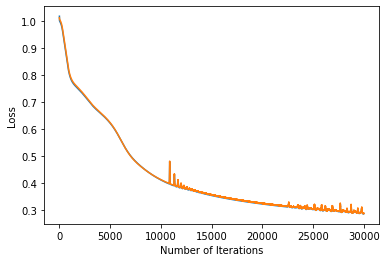

In [6]:
loss_list = []
test_loss_list = []
for iteration in range(iteration_number):
    optimizer.zero_grad()
    results = model(inputs)
    loss = mse(results, targets)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)

    test_results = model(test_inputs)
    test_loss = mse(test_results, test_targets)
    test_loss_list.append(test_loss.data)

    if iteration % 50 == 0:
        print('epoch %3d, trian loss : %f, test loss : %f ' % (iteration, loss.data, test_loss.data))


plt.plot(range(iteration_number), loss_list, range(iteration_number), test_loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()


input_x_test = torch.from_numpy(x_test_scaled)
predicted = model(input_x_test.float()).data.numpy()

In [10]:
predict_valid_y = model(input_x_test.float()).data.numpy()
evaluateRegressor(test_targets, predict_valid_y)
predict_valid_y = sc.inverse_transform(predict_valid_y)
evaluateRegressor(y_test, predict_valid_y,"    Valid Set")

    Test Set
MSE : 0.3799472
MAE : 0.40624523
RMSE : 0.6122048
R-Squared : 0.6226670779408663
    Valid Set
MSE : 69970.68676122156
MAE : 91.69348440674702
RMSE : 124.54921852721732
R-Squared : 0.6226670777739932
